    
# DATA DAY TRAINING: Intro to Python

## Introduction
In this notebook, the objective is to demonstrate how you can use Python in a typical data science task (in this case, data analysis). To achive this, we will explore how life satisfaction varies with GDP per capita by using OECD life index data for life satisficayion and WBG data for GPD per capita. We will demonstrate the following work flow:
1. Data Ingestion
2. Data Exploration, Processing and Cleaning (including merging the two datasets)
3. Exploratory Data Analysis (descriptive statistics)
4. Multivariate Data Visualization

### Data Source:

For this notebook, we access the WBG World Development Indicators API for countries' GDP per capita (PPP, current dollars) data for 2015. (https://data.worldbank.org/indicator/ny.gdp.pcap.cd) 

We also download the Better Life Index data for 2016 (BLI2016.csv) from the OECD Better Life Index (https://stats.oecd.org/Index.aspx?DataSetCode=BLI). 

Data definitions available at the end of this notebook.

### Importing libraries
Python provides at least three different ways to import modules. You can use the import statement, the from statement, or the builtin __import__ function. See below how these work: 

- **import X** imports the module X, and creates a reference to that module in the current namespace. Or in other words, after you’ve run this statement, you can use X.name to refer to things defined in module X. Here you can also create a shorthand for a module and so like so: *import X as c* as you will see below.

- **from X import \* ** imports the module X, and creates references in the current namespace to all public objects defined by that module (that is, everything that doesn’t have a name starting with “_”). Or in other words, after you’ve run this statement, you can simply use a plain name to refer to things defined in module X. But X itself is not defined, so X.name doesn’t work. And if name was already defined, it is replaced by the new version. And if name in X is changed to point to some other object, your module won’t notice. *This approach is usually not recommended because you can run into issues with conflicting names*.

- **from X import a, b, c ** imports the module X, and creates references in the current namespace to the given objects. Or in other words, you can now use a and b and c in your program.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from matplotlib.pyplot import figure
from pandas_datareader import wb

/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


### Read data into a python dataframe (GDP per capita- PPP- current dollars, for countries in 2015 using the World Bank's World Development Indicators API)

# Data Ingestion Using Python
In Python, you can ingest data of **virtually any format and from any data source**. For example, when it comes to sources
you can ingest flat files on your computer, connect to database engines, data lakes, access web APIs, scrape websites, connect to 
cloud based storage (AWS, Azure etc) and many more. While for data formats, you can ingest text files (CSV/TSV/Excel, JSON, Parque, pickled objects etc),
documents (PDFs, html, RichText, etc), videos and images, sensor and streaming data from IoT and more. 
This is unlike proprietary systems which often has some form of limitations on data interoperability.

In the following cells, we show how to ingest data from two sources: API (WBG indicators API) and a CSV file on a local machine.

# Data Exploration With Pandas Library
We are using Pandas library because its the de facto tool in Python for data munging. 
It became like this because it presents data in the familiar tabular form just like Excel, 
STATA, SPSS, R and other traditional statistical packages as you know them. 
In the next couple of cells, we show you some handy functions for quick exploration of a data set such as:
- Checking the dimenstion of the data: df.shape
- Viewing the data: df.head(n), note that the n is optional
- Accessing/indexing columns. Two main ways: *df.column_name or df[column_name]*
- Checking columns: df.columns
- Checking data types: df.dtypes

In case you need to know what each function does in pandas, use this trick to get details:
df.function_name?. Note that you dont include the brackets. You will get documentation about this partcular function

### Read data into a python dataframe (GDP per capita PPP Current Dollars from the World Bank Indicators API)

In [0]:
country_list = wb.get_countries()

In [0]:
country_list=country_list[country_list.region!='Aggregates']

In [38]:
country_list.head(3)

,adminregion,capitalCity,iso3c,incomeLevel,iso2c,latitude,lendingType,longitude,name,region
0,,Oranjestad,ABW,High income,AW,12.51670,Not classified,-70.0167,Aruba,Latin America & Caribbean
1,South Asia,Kabul,AFG,Low income,AF,34.52280,IDA,69.1761,Afghanistan,South Asia
3,Sub-Saharan Africa (excluding high income),Luanda,AGO,Lower middle income,AO,-8.81155,IBRD,13.2420,Angola,Sub-Saharan Africa


In [6]:
country_list.shape

(218, 10)

In [0]:
countries = country_list.iso3c.tolist()

In [0]:
GNI_capita_code = "NY.GNP.PCAP.CD"

In [8]:
reader = wb.WorldBankReader(symbols=[GNI_capita_code], countries = countries,start=2015,end=2015)
df1 = reader.read()

/usr/local/lib/python3.6/dist-packages/pandas_datareader/wb.py:134: UserWarning: Non-standard ISO country codes: CHI, XKX
  'country codes: %s' % tmp, UserWarning)


In [9]:
df1.shape

(217, 1)

In [10]:
df1.head()

,,NY.GNP.PCAP.CD
country,year,
Aruba,2015,23780.0
Afghanistan,2015,610.0
Angola,2015,4520.0
Albania,2015,4390.0
Andorra,2015,NaN


In [0]:
df3 = df1.reset_index()
df1 = df3

### Read data into a python dataframe (Life Satisfaction Score for countries in 2015 from the OECD's Better Life Index)

In [0]:
# Set path to the OECD dataset with data from 2015 on life satisfaction
PATH = 'https://raw.githubusercontent.com/worldbank/python-101/master/notebooks/BLI2015.csv'

In [0]:
# read csv file into a dataframe
df2 = pd.read_csv(PATH)

In [14]:
df2.shape

(3292, 17)

In [15]:
#names of all columns
print(df2.columns)

Index(['LOCATION', 'Country', 'INDICATOR', 'Indicator', 'MEASURE', 'Measure',
       'INEQUALITY', 'Inequality', 'Unit Code', 'Unit', 'PowerCode Code',
       'PowerCode', 'Reference Period Code', 'Reference Period', 'Value',
       'Flag Codes', 'Flags'],
      dtype='object')


In [16]:
#first five observations
df2.head(2)

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,1.1,E,Estimated value
1,AUT,Austria,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,1.0,NaN,NaN


# Manipulating DataFrames
Just like in STATA and other statistical packages, its straightfoward to use existing 
resources to manipulate a dataframe once its loaded. For instance, you can do the following:
- subset the data based on columns (e.g., select a subset of columns) or based on some logical condition.
- Rename columns
- change data types
- create new variables based on other variables
- merging/joining dataframes
- plus more

In the next cells, you will see how some of this work.


In [0]:
# creating a dataframe with only the columns needed
df2=df2[['LOCATION','Country','INDICATOR','Inequality','Unit','Value']]

In [18]:
# first five observations for this new dataframe
df2.head()

,LOCATION,Country,INDICATOR,Inequality,Unit,Value
0,AUS,Australia,HO_BASE,Total,Percentage,1.1
1,AUT,Austria,HO_BASE,Total,Percentage,1.0
2,BEL,Belgium,HO_BASE,Total,Percentage,2.0
3,CAN,Canada,HO_BASE,Total,Percentage,0.2
4,CZE,Czech Republic,HO_BASE,Total,Percentage,0.9


By default, when you perfom an action on a pandas dataframe, it returns a new dataframe. However, 
in some cases, you may need to modify the existing dataframe, I guess to avoid messy variable names 
look of df1, df2, df50, nobody like them. To achieve this, you use the *inplace* option and set it to
True which tells pandas to modify the dataframe. You will see this below.

In [0]:
#renaming all columns so they're lowercase
df2.rename(columns={'LOCATION':'iso3c', 'Country':'country', 'INDICATOR':'indicator','Inequality':'inequality','Unit':'unit', 'Value':'value'}, 
                 inplace=True)

In [0]:
# subsetting dataframe with only those observations with 
# SW_LIFS (life satisfaction) under indicator & 
#'Total' under inequality (removing this condition can give us additional disaggregated scores for Men and Women)

df2=df2.loc[(df2['indicator'] == "SW_LIFS") & (df2['inequality'] == "Total")]

In [21]:
# first five observations in this dataframe
df2.head()

,iso3c,country,indicator,inequality,unit,value
2669,AUS,Australia,SW_LIFS,Total,Average score,7.3
2670,AUT,Austria,SW_LIFS,Total,Average score,6.9
2671,BEL,Belgium,SW_LIFS,Total,Average score,6.9
2672,CAN,Canada,SW_LIFS,Total,Average score,7.3
2673,CZE,Czech Republic,SW_LIFS,Total,Average score,6.5


In [0]:
### Merge the two dataframes on GDP per capita PPP (df1) and life satisfaction (df2)

In [0]:
# merging the dataframes derived from OECD (life satisfaction) and IMF (gdp_per_capita)
df=pd.merge(df1, df2, on='country')

In [24]:
# first five obvservatins of the merged dataset
df.head()

,country,year,NY.GNP.PCAP.CD,iso3c,indicator,inequality,unit,value
0,Australia,2015,60360.0,AUS,SW_LIFS,Total,Average score,7.3
1,Austria,2015,47630.0,AUT,SW_LIFS,Total,Average score,6.9
2,Belgium,2015,44230.0,BEL,SW_LIFS,Total,Average score,6.9
3,Brazil,2015,10090.0,BRA,SW_LIFS,Total,Average score,7.0
4,Canada,2015,47460.0,CAN,SW_LIFS,Total,Average score,7.3


In [0]:
# renaming columns to be descriptive of what's stored in them

df.rename(columns={'NY.GNP.PCAP.CD':'gdp_per_capita','value':'life_sat_score'}, 
                 inplace=True)

In [26]:
# This is the clean dataframe we'll use for the analysis
df.head()

,country,year,gdp_per_capita,iso3c,indicator,inequality,unit,life_sat_score
0,Australia,2015,60360.0,AUS,SW_LIFS,Total,Average score,7.3
1,Austria,2015,47630.0,AUT,SW_LIFS,Total,Average score,6.9
2,Belgium,2015,44230.0,BEL,SW_LIFS,Total,Average score,6.9
3,Brazil,2015,10090.0,BRA,SW_LIFS,Total,Average score,7.0
4,Canada,2015,47460.0,CAN,SW_LIFS,Total,Average score,7.3


In [27]:
df.shape

(34, 8)

# EXERCISES: Now we can start exploring the data

We have looked at the tools Python has for data processing and cleaning, 
now lets explore the available functionality for statistical exploration of the data. 
At this stage, we want to do things like:
- check distribution of the variables using *df.describe()*
- get value counts, mostly useful for categorical variables: *df[col_name].value_counts()*
- sort the data: df.sort_values


Exercise 1: Display descriptive Statistics for the whole dataset (using dataframe.describe()

In [0]:
#Your code here: 




Exercise 2: What is the maximum GDP per capita in 2015? (using dataframe.col_name.max()

In [0]:
#Your code here:

In [29]:
#SAMPLE CODE:
#Which country has maximum value for life satisfaction in 2015 
max_sat = (df[df.inequality == 'Total'].life_sat_score.idxmax())

print(df[df.inequality=='Total']
.loc[max_sat]
.country)

Switzerland


Exercise 3: Which country has the minimum GDP per capita in 2015? (HINT: use column name=gdp_per_capita and idmin() 

In [0]:
# Your code here: 



### Visualizing in a scatterplot

Python has extensive data visualization capabilities from the good old static plots to the more cool interaactive visualization. The base package for the plotting in Python is the [Matplotlib](https://matplotlib.org). They are other up and coming packages which are built on top of Matplotlib such as [seaborn](https://seaborn.pydata.org) which offers more visually appealing plots and extra functionalities. Also, Pandas has also built in plotting capabilities. If you need interactive visualizations, then [Bokeh](https://bokeh.pydata.org/en/latest/). In the cells below, we show how to build a simple scatter plot using Matplotlib.

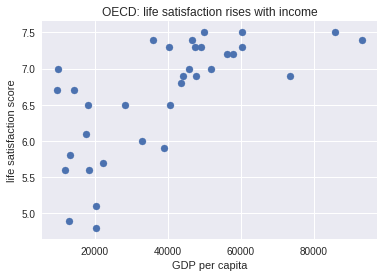

In [30]:
# Scatterplot with labels 
fig,ax = plt.subplots(figsize=[6,4])

ax.scatter(df.gdp_per_capita, df.life_sat_score)
ax.set(xlabel = 'GDP per capita', ylabel = 'life satisfaction score',title='OECD: life satisfaction rises with income');

# Modelling and Machine Learning
When it comes to building statistical and/or machine learning, Python offers many options. In general, 
Python has much strong capabilities for Machine Learning models than statistical and econometrics models
but they is alot you can with statistical modelling capabilities. Some of the go to libraries for 
statistical analysis, linear algebra and other scientific computing are: [statsmodels](https://www.statsmodels.org/stable/index.html), [scipy](https://www.scipy.org), [numpy](http://www.numpy.org). If you want to do Machine Learning (Deep Learning included), the following libraries are excellent:
- scikit-learn: a general purpose machine learning library
- TensorFlow/Keras/Theano: Focused more on deep learning and nerural networks
- Apache Spark ML Lib: For distributed machine learning with large datasets

In the cells below, we show how to build a regression model using statsmodel.
    

In [31]:
y = df.life_sat_score
X = df.gdp_per_capita

X = sm.add_constant(X)

model = sm.OLS(y,X).fit()
model.params

const             5.659271
gdp_per_capita    0.000025
dtype: float64

In [32]:
#Constant
model.params[0]

5.6592706879235255

In [33]:
#Coefficient for GDP per capita
model.params[1]

2.4827374734458807e-05

In [34]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         life_sat_score   R-squared:                       0.456
Model:                            OLS   Adj. R-squared:                  0.439
Method:                 Least Squares   F-statistic:                     26.77
Date:                Mon, 11 Feb 2019   Prob (F-statistic):           1.20e-05
Time:                        19:37:12   Log-Likelihood:                -29.540
No. Observations:                  34   AIC:                             63.08
Df Residuals:                      32   BIC:                             66.13
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              5.6593      0.212     26.639      0.000       5.227       6.092
gdp_per_capita  2.483e-05    4.8e-06      5.174      0.000    1.51e-05    3.46e-05
==============================================================================
Omnibus:                        1.115   Durbin-Watson:                   1.683
Prob(Omnibus):                  0.573   Jarque-Bera (JB):                1.051
Skew:                          -0.390   Prob(JB):                        0.591
Kurtosis:                       2.635   Cond. No.                     9.22e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.22e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

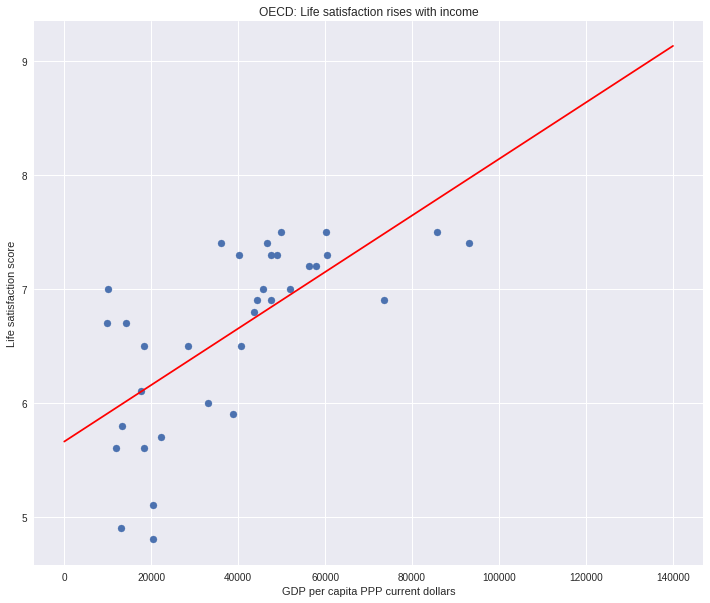

In [35]:
fig,ax = plt.subplots(figsize=[12, 10])

ax.scatter(df.gdp_per_capita, df.life_sat_score)
ax.set(xlabel = 'GDP per capita PPP current dollars', ylabel = 'Life satisfaction score',title='OECD: Life satisfaction rises with income');

X_plot = np.linspace(0,140000,1000)
ax.plot(X_plot, X_plot*model.params[1]+ model.params[0],color='r');

# Data Definition:

## GDP per capita (current US dollars)

Indicator ID: NY.GDP.PCAP.CD

GDP per capita is gross domestic product divided by midyear population. GDP is the sum of gross value added by all resident producers in the economy plus any product taxes and minus any subsidies not included in the value of the products. It is calculated without making deductions for depreciation of fabricated assets or for depletion and degradation of natural resources. Data are in current U.S. dollars.

Source: World Bank national accounts data, and OECD National Accounts data files.

## Life satisfaction (Subjective well-being) 

Life satisfaction

Indicator ID=SW_LIFS

The indicator considers people's evaluation of their life as a whole. It is a weighted-sum of different
response categories based on people's rates of their current life relative to the best and worst possible
lives for them on a scale from 0 to 10, using the Cantril Ladder (known also as the "Self-Anchoring Striving
Scale")
Unit of measurement: Mean value (Cantril Ladder)
Additional information: Gender inequality (men versus women); Socio-economic inequality
(educational attainment 5/6 ISCED group versus 0/1 ISCED group)
Source: OECD calculations based on Gallup World Poll

